 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/ngsa-air-routes-analysis/code/exploration_europe.ipynb#Air-route-network-exploration" data-toc-modified-id="Air-route-network-exploration-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Air route network exploration</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/ngsa-air-routes-analysis/code/exploration_europe.ipynb#Preprocessing" data-toc-modified-id="Preprocessing-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/ngsa-air-routes-analysis/code/exploration_europe.ipynb#Limiting-the-dataset-to-Europe" data-toc-modified-id="Limiting-the-dataset-to-Europe-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Limiting the dataset to Europe</a></span></li><li><span><a href="http://localhost:8888/notebooks/ngsa-air-routes-analysis/code/exploration_europe.ipynb#Handling-missing-values" data-toc-modified-id="Handling-missing-values-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Handling missing values</a></span></li><li><span><a href="http://localhost:8888/notebooks/ngsa-air-routes-analysis/code/exploration_europe.ipynb#Handling-duplicate-lines" data-toc-modified-id="Handling-duplicate-lines-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Handling duplicate lines</a></span></li><li><span><a href="http://localhost:8888/notebooks/ngsa-air-routes-analysis/code/exploration_europe.ipynb#Preprocess" data-toc-modified-id="Preprocess-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Preprocess</a></span></li><li><span><a href="http://localhost:8888/notebooks/ngsa-air-routes-analysis/code/exploration_europe.ipynb#Creating-the-graphs" data-toc-modified-id="Creating-the-graphs-1.1.5"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>Creating the graphs</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/ngsa-air-routes-analysis/code/exploration_europe.ipynb#Directed-graph" data-toc-modified-id="Directed-graph-1.1.5.1"><span class="toc-item-num">1.1.5.1&nbsp;&nbsp;</span>Directed graph</a></span></li><li><span><a href="http://localhost:8888/notebooks/ngsa-air-routes-analysis/code/exploration_europe.ipynb#Undirected-graph" data-toc-modified-id="Undirected-graph-1.1.5.2"><span class="toc-item-num">1.1.5.2&nbsp;&nbsp;</span>Undirected graph</a></span></li></ul></li></ul></li><li><span><a href="http://localhost:8888/notebooks/ngsa-air-routes-analysis/code/exploration_europe.ipynb#Basic-statistics" data-toc-modified-id="Basic-statistics-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Basic statistics</a></span></li><li><span><a href="http://localhost:8888/notebooks/ngsa-air-routes-analysis/code/exploration_europe.ipynb#Degree-Distribution" data-toc-modified-id="Degree-Distribution-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Degree Distribution</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/ngsa-air-routes-analysis/code/exploration_europe.ipynb#Biggest-airports-(in/out-degrees)" data-toc-modified-id="Biggest-airports-(in/out-degrees)-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Biggest airports (in/out degrees)</a></span></li><li><span><a href="http://localhost:8888/notebooks/ngsa-air-routes-analysis/code/exploration_europe.ipynb#Plot-of-the-(in/out)-degree-distribution" data-toc-modified-id="Plot-of-the-(in/out)-degree-distribution-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Plot of the (in/out)-degree distribution</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/ngsa-air-routes-analysis/code/exploration_europe.ipynb#Robustness" data-toc-modified-id="Robustness-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Robustness</a></span></li><li><span><a href="http://localhost:8888/notebooks/ngsa-air-routes-analysis/code/exploration_europe.ipynb#Hazard-simulation" data-toc-modified-id="Hazard-simulation-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Hazard simulation</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/ngsa-air-routes-analysis/code/exploration_europe.ipynb#Impact-of-Eyjafjallajökull-volcano" data-toc-modified-id="Impact-of-Eyjafjallajökull-volcano-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Impact of Eyjafjallajökull volcano</a></span></li><li><span><a href="http://localhost:8888/notebooks/ngsa-air-routes-analysis/code/exploration_europe.ipynb#Impact-of-random-hazards-in-Europe" data-toc-modified-id="Impact-of-random-hazards-in-Europe-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Impact of random hazards in Europe</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/ngsa-air-routes-analysis/code/exploration_europe.ipynb#Europe-map-with-connections" data-toc-modified-id="Europe-map-with-connections-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Europe map with connections</a></span></li></ul></li></ul></div>

# Air route network exploration

In [1]:
from collections import Counter
from tqdm import tqdm
import utils

import matplotlib.pyplot as plt 
import networkx as nx
import pandas as pd
import numpy as np
import os

In [2]:
%matplotlib inline
plt.style.use("ggplot")

In [75]:
%load_ext autoreload
%autoreload 2

%load_ext line_profiler

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
path_data = "../data/"

Dataset source: https://openflights.org/data.html

**ROUTES DATASET**
- **Airline** 2-letter (IATA) or 3-letter (ICAO) code of the airline.
- **Airline ID** Unique OpenFlights identifier for airline (see Airline).
- **Source airport** 3-letter (IATA) or 4-letter (ICAO) code of the source airport.
- **Source airport ID** Unique OpenFlights identifier for source airport (see Airport)
- **Destination airport** 3-letter (IATA) or 4-letter (ICAO) code of the destination airport.
- **Destination airport ID** Unique OpenFlights identifier for destination airport (see Airport)
- **Codeshare** "Y" if this flight is a codeshare (that is, not operated by Airline, but another carrier), empty otherwise.
- **Stops** Number of stops on this flight ("0" for direct)
- **Equipment** 3-letter codes for plane type(s) generally used on this flight, separated by spaces


**AIRPORTS DATASET**
- **Airport ID** Unique OpenFlights identifier for this airport.
- **Name** Name of airport. May or may not contain the City name.
- **City** Main city served by airport. May be spelled differently from Name.
- **Country** Country or territory where airport is located. See countries.dat to cross-reference to ISO 3166-1 codes.
- **IATA** 3-letter IATA code. Null if not assigned/unknown.
- **ICAO** 4-letter ICAO code. Null if not assigned.
- **Latitude**Decimal degrees, usually to six significant digits. Negative is South, positive is North.
- **Longitude** Decimal degrees, usually to six significant digits. Negative is West, positive is East.
- **Altitude** In feet.
- **Timezone** Hours offset from UTC. Fractional hours are expressed as decimals, eg. India is 5.5.
- **DST** Daylight savings time. One of E (Europe), A (US/Canada), S (South America), O (Australia), Z (New Zealand), N (None) or U (Unknown). See also: Help: Time
- **Tz database time zone** Timezone in "tz" (Olson) format, eg. "America/Los_Angeles".
- **Type** Type of the airport. Value "airport" for air terminals, "station" for train stations, "port" for ferry terminals and "unknown" if not known. In airports.csv, only type=airport is included.
- **Source** Source of this data. "OurAirports" for data sourced from OurAirports, "Legacy" for old data not matched to OurAirports (mostly DAFIF), "User" for unverified user contributions. In airports.csv, only source=OurAirports is included.

In [7]:
col_names_routes = ["airline", "id_airline", "source_airport", 
             "id_source_airport", "destination_airport",
             "id_destination_airport", "codeshare",
             "stops", "equipment"
            ]

col_names_airports = ["id_airport", "name", "city", 
             "country", "IATA", "ICAO", "latitude",
             "longitude", "altitude", "tz", "dst", "tz_db",
             "type", "source"
            ]

df = pd.read_table(os.path.join(path_data, "routes.dat"),
                   sep=",", names=col_names_routes)

df_airports = pd.read_table(os.path.join(path_data, "airports.dat"),
                   sep=",", names=col_names_airports, index_col=0)

In [8]:
df.head()

,airline,id_airline,source_airport,id_source_airport,destination_airport,id_destination_airport,codeshare,stops,equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


In [9]:
df_airports.head()

,name,city,country,IATA,ICAO,latitude,longitude,altitude,tz,dst,tz_db,type,source
id_airport,,,,,,,,,,,,,
1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


## Preprocessing

### Limiting the dataset to Europe

- Take only the European airports

In [10]:
countries_eur = ["Albania", "Andorra", "Armenia", "Austria", "Azerbaijan", "Belarus", 
                 "Belgium", "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", 
                 "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Georgia", 
                 "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy", 
                 "Kazakhstan", "Kosovo", "Latvia", "Liechtenstein", "Lithuania", 
                 "Luxembourg", "Macedonia", "Malta", "Moldova", "Monaco", "Montenegro", 
                 "Netherlands", "Norway", "Poland", "Portugal", "Romania", 
                 "Russia", "San Marino", "Serbia", "Slovakia", "Slovenia", 
                 "Spain", "Sweden", "Switzerland", "Turkey", "Ukraine", "United Kingdom"]

df_airports_eur = df_airports[df_airports["country"].isin(countries_eur)]
df_airports_eur.head()

,name,city,country,IATA,ICAO,latitude,longitude,altitude,tz,dst,tz_db,type,source
id_airport,,,,,,,,,,,,,
11,Akureyri Airport,Akureyri,Iceland,AEY,BIAR,65.660004,-18.072701,6,0,N,Atlantic/Reykjavik,airport,OurAirports
12,Egilsstaðir Airport,Egilsstadir,Iceland,EGS,BIEG,65.283302,-14.401400,76,0,N,Atlantic/Reykjavik,airport,OurAirports
13,Hornafjörður Airport,Hofn,Iceland,HFN,BIHN,64.295601,-15.227200,24,0,N,Atlantic/Reykjavik,airport,OurAirports
14,Húsavík Airport,Husavik,Iceland,HZK,BIHU,65.952301,-17.426001,48,0,N,Atlantic/Reykjavik,airport,OurAirports
15,Ísafjörður Airport,Isafjordur,Iceland,IFJ,BIIS,66.058098,-23.135300,8,0,N,Atlantic/Reykjavik,airport,OurAirports


- Take only the routes intra Europe

In [11]:
airports_eur = list(df_airports_eur['IATA'].unique())
df_eur = df[(df['source_airport'].isin(airports_eur)) & (df['destination_airport'].isin(airports_eur))]
df_eur.head()
print("There are {} airports in Europe".format(len(airports_eur)))

There are 1071 airports in Europe


### Handling missing values
The dataset provider indicates that *"the special value \N is used for "NULL" to indicate that no value is available".* We decided to delete the airports for which no id is linked.

In [12]:
# Counting the number of missing id source airports and missing id destination airports
print("#Missing Source IDs: {}".format(len(df_eur[df_eur.id_source_airport == "\\N"])))
print("#Missing Source IDs: {}".format(len(df_eur[df_eur.id_destination_airport == "\\N"])))

#Missing Source IDs: 0
#Missing Source IDs: 0


### Handling duplicate lines

As we do not consider airlines or equipments, we delete duplicate lines (i.e. with same id_source_airport AND id_source_airport).

In [13]:
df_eur.groupby(["id_source_airport", "id_destination_airport"]).count()

airline  id_airline  source_airport  \
id_source_airport id_destination_airport                                        
1051              1054                          2           2               2   
                  1055                          1           1               1   
                  1056                          2           2               2   
                  1057                          1           1               1   
                  1216                          2           2               2   
                  1218                          3           3               3   
                  1229                          3           3               3   
                  1418                          1           1               1   
                  1423                          2           2               2   
                  1524                          1           1               1   
                  1525                          1           1               1   
                  1550                          1           1               1   
                  1555                          1           1               1   
                  1562                          1           1               1   
                  1612                          2           2               2   
                  1613                          2           2               2   
                  1678                          2           2               2   
                  302                           1           1               1   
                  304                           1           1               1   
                  337                           1           1               1   
                  339                           1           1               1   
                  340                           2           2               2   
                  342                           2           2               2   
                  344                           2           2               2   
                  345                           3           3               3   
                  346                           3           3               3   
                  347                           1           1               1   
                  348                           2           2               2   
                  350                           2           2               2   
                  351                           1           1               1   
...                                           ...         ...             ...   
8414              657                           1           1               1   
                  668                           1           1               1   
                  680                           1           1               1   
                  699                           1           1               1   
8428              2975                          1           1               1   
                  2988                          1           1               1   
                  6139                          1           1               1   
                  6140                          1           1               1   
8740              4029                          1           1               1   
8774              2948                          1           1               1   
                  4029                          1           1               1   
8775              4029                          1           1               1   
8782              2933                          1           1               1   
8944              2937                          2           2               2   
9026              2923                          3           3               3   
                  2937                          3           3               3   
9044              1682                          1           1            

In [14]:
# Example
df_eur[((df_eur.id_source_airport == "1051") & (df_eur.id_destination_airport == "1054"))]

,airline,id_airline,source_airport,id_source_airport,destination_airport,id_destination_airport,codeshare,stops,equipment
43722,NT,1539,FUE,1051,LPA,1054,NaN,0,AT7
45999,PM,5016,FUE,1051,LPA,1054,NaN,0,SWM AT4


### Preprocess

In [15]:
from utils import preprocess

In [16]:
df_eur_processed = preprocess(df_eur)
df_eur_processed.shape

(11835, 2)

In [17]:
df_eur_processed.head()

,source_airport,destination_airport
0,AER,KZN
1,ASF,KZN
2,ASF,MRV
3,CEK,KZN
4,CEK,OVB


In [18]:
airport_eur_iata_ids = list(df_eur_processed.source_airport\
                            .append(df_eur_processed.destination_airport).unique())

In [19]:
n_unique_airports = len(airport_eur_iata_ids)
print("There are {} unique airports in Europe".format(n_unique_airports))

There are 662 unique airports in Europe


> Notice that the number of european airports in the airports table was 1071. Thus there 409 airports for which there are no routes, or for which the routes are only outside Europe.



We will reduce the airports table to these 662 airports:

In [20]:
df_airports_eur = df_airports_eur[df_airports_eur.IATA.isin(airport_eur_iata_ids)]

In [21]:
df_airports_eur.shape

(662, 13)

### Creating the graphs

In [22]:
arr_edges = np.array(df_eur_processed)

In [23]:
arr_edges.shape

(11835, 2)

#### Directed graph

In [24]:
G_dir = nx.DiGraph()
G_dir.add_edges_from(arr_edges)

In [25]:
n_edges_dir = len(G_dir.edges())
print("There are {} directional routes".format(n_edges_dir))

There are 11835 directional routes


#### Undirected graph

In [26]:
G = nx.Graph()
G.add_edges_from(arr_edges)

In [27]:
n_edges = len(G.edges())
print("There are {} bidirectional routes".format(n_edges))

There are 5984 bidirectional routes


## Basic statistics

In [28]:
print("#Routes: {}".format(df_eur_processed.shape[0]))
print("#Unique Source Airports: {}".format(df_eur_processed.source_airport.nunique()))
print("#Unique Target Airports: {}".format(df_eur_processed.destination_airport.nunique()))
nodes = np.unique(np.concatenate([df_eur_processed.source_airport, df_eur_processed.destination_airport]))
print("#Nodes: {}".format(len(nodes)))

#Routes: 11835
#Unique Source Airports: 661
#Unique Target Airports: 662
#Nodes: 662


## Degree Distribution

In [29]:
# {(id_airport, in_degree)} dict
in_degrees_dic = dict(G_dir.in_degree())
# List of in_degrees
in_degrees_list = in_degrees_dic.values()

# {(id_airport, out_degree)} dict
out_degrees_dic = dict(G_dir.out_degree())
# List of out_degrees
out_degrees_list = out_degrees_dic.values()

### Biggest airports (in/out degrees)

In [30]:
max_in = max(in_degrees_list)
max_out = max(out_degrees_list)

# Find node id with degrees max_in and max_out
max_in_nodes = utils.find_key(in_degrees_dic, max_in)
max_out_nodes = utils.find_key(out_degrees_dic, max_out)

print("Max in-degree (nodes {}): {}".format(max_in_nodes, max_in))
print("Max out-degree (nodes {}): {}".format(max_out_nodes, max_out))

Max in-degree (nodes ['AMS']): 150
Max out-degree (nodes ['AMS']): 151


In [31]:
# n biggest airports to show 
n_biggest = 6

In [32]:
# Use the IATA code as the index
df_airports_eur.index = df_airports_eur.IATA

In [33]:
df_airports_eur.head()

,name,city,country,IATA,ICAO,latitude,longitude,altitude,tz,dst,tz_db,type,source
IATA,,,,,,,,,,,,,
AEY,Akureyri Airport,Akureyri,Iceland,AEY,BIAR,65.660004,-18.072701,6,0,N,Atlantic/Reykjavik,airport,OurAirports
EGS,Egilsstaðir Airport,Egilsstadir,Iceland,EGS,BIEG,65.283302,-14.401400,76,0,N,Atlantic/Reykjavik,airport,OurAirports
IFJ,Ísafjörður Airport,Isafjordur,Iceland,IFJ,BIIS,66.058098,-23.135300,8,0,N,Atlantic/Reykjavik,airport,OurAirports
KEF,Keflavik International Airport,Keflavik,Iceland,KEF,BIKF,63.985001,-22.605600,171,0,N,Atlantic/Reykjavik,airport,OurAirports
RKV,Reykjavik Airport,Reykjavik,Iceland,RKV,BIRK,64.129997,-21.940599,48,0,N,Atlantic/Reykjavik,airport,OurAirports


In [34]:
df_eur_processed.head()

,source_airport,destination_airport
0,AER,KZN
1,ASF,KZN
2,ASF,MRV
3,CEK,KZN
4,CEK,OVB


In [35]:
# 6 "biggest" airports regarding out_degree
df_eur_processed.groupby("source_airport").count()\
        .sort_values("destination_airport", ascending=False)[:n_biggest]\
        .join(df_airports_eur)\
        [["destination_airport", "name", "city", "country"]]\
        .rename(columns= {"destination_airport": "Number of destinations"})

,Number of destinations,name,city,country
source_airport,,,,
AMS,151,Amsterdam Airport Schiphol,Amsterdam,Netherlands
STN,146,London Stansted Airport,London,United Kingdom
MUC,146,Munich International Airport,Munich,Germany
DME,144,Domodedovo International Airport,Moscow,Russia
BCN,136,Barcelona International Airport,Barcelona,Spain
FRA,134,Frankfurt am Main International Airport,Frankfurt,Germany


In [36]:
# "biggest" airports regarding in_degree
df_eur_processed.groupby("destination_airport").count()\
        .sort_values("source_airport", ascending=False)[:n_biggest]\
        .join(df_airports_eur)[["source_airport", "name", "city", "country"]]\
        .rename(columns= {"source_airport": "Number of incoming flights"})

,Number of incoming flights,name,city,country
destination_airport,,,,
AMS,150,Amsterdam Airport Schiphol,Amsterdam,Netherlands
DME,145,Domodedovo International Airport,Moscow,Russia
STN,145,London Stansted Airport,London,United Kingdom
MUC,144,Munich International Airport,Munich,Germany
BCN,136,Barcelona International Airport,Barcelona,Spain
IST,133,Atatürk International Airport,Istanbul,Turkey


### Plot of the (in/out)-degree distribution

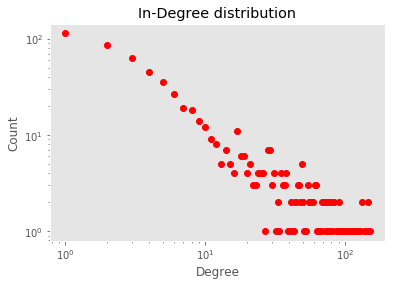

In [37]:
utils.plot_distribution(G_dir, what="in", title="In-Degree distribution")

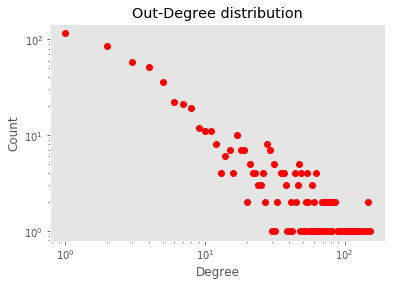

In [38]:
utils.plot_distribution(G_dir, what="out", title="Out-Degree distribution")

## Robustness

In [39]:
gcc = max(nx.connected_component_subgraphs(G), key=len)
(props, Y_random, Y_target) = utils.create_features_for_plot(0, 0.2, 10, gcc)

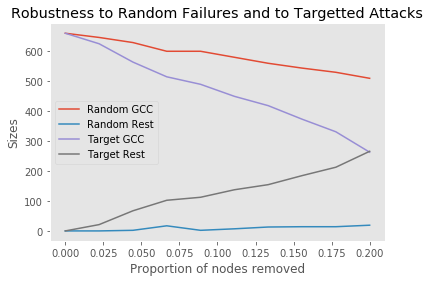

In [40]:
utils.plot_robustness(props, Y_random, Y_target)

## Hazard simulation

In [79]:
from PyGeoTools.geolocation import GeoLocation
from spatial_hazards import SpatialHazards

In [80]:
df_airports_eur.head()

,name,city,country,IATA,ICAO,latitude,longitude,altitude,tz,dst,tz_db,type,source,is_affected
IATA,,,,,,,,,,,,,,
AEY,Akureyri Airport,Akureyri,Iceland,AEY,BIAR,65.660004,-18.072701,6,0,N,Atlantic/Reykjavik,airport,OurAirports,1
EGS,Egilsstaðir Airport,Egilsstadir,Iceland,EGS,BIEG,65.283302,-14.401400,76,0,N,Atlantic/Reykjavik,airport,OurAirports,1
IFJ,Ísafjörður Airport,Isafjordur,Iceland,IFJ,BIIS,66.058098,-23.135300,8,0,N,Atlantic/Reykjavik,airport,OurAirports,1
KEF,Keflavik International Airport,Keflavik,Iceland,KEF,BIKF,63.985001,-22.605600,171,0,N,Atlantic/Reykjavik,airport,OurAirports,1
RKV,Reykjavik Airport,Reykjavik,Iceland,RKV,BIRK,64.129997,-21.940599,48,0,N,Atlantic/Reykjavik,airport,OurAirports,1


In [81]:
df_eur_processed.head()

,source_airport,destination_airport
0,AER,KZN
1,ASF,KZN
2,ASF,MRV
3,CEK,KZN
4,CEK,OVB


Let's take as an example the AEY airport and check which airports are within 1km distance from it:

In [82]:
spatial_hazards = SpatialHazards(df_airports_eur, df_eur_processed)

Number of initial airports: 662
Number of initial routes: 5984
Number of airports in the GCC initially: 658


In [83]:
spatial_hazards.simulate_hazard(65.660004, -18.072701, 1, verbose=True)

Proportion of closed airports: 0.151%
Proportion of cancelled routes: 0.017%
new GCC size / initial GCC size: 100.000%


(0.0015105740181268882, 0.00016711229946524063, 1.0)

Variables to track:
- `SpatialHazards.proportion_airports_closed`
- `SpatialHazards.proportion_routes_cancelled`
- `SpatialHazards.proportion_GCC`

Let's simulate the eruption of the Eyjafjallajokull volcano in 2010 located at (63.628303°, -19.605352°):


In [51]:
lat_volcano = 63.628303
long_volcano = -19.605352

In [84]:
spatial_hazards.simulate_hazard(lat_volcano, long_volcano, 2000, verbose=True)

Proportion of closed airports: 23.565%
Proportion of cancelled routes: 36.330%
new GCC size / initial GCC size: 74.924%


(0.23564954682779457, 0.36330213903743314, 0.7492401215805471)

In [142]:
plt.style.use("seaborn")

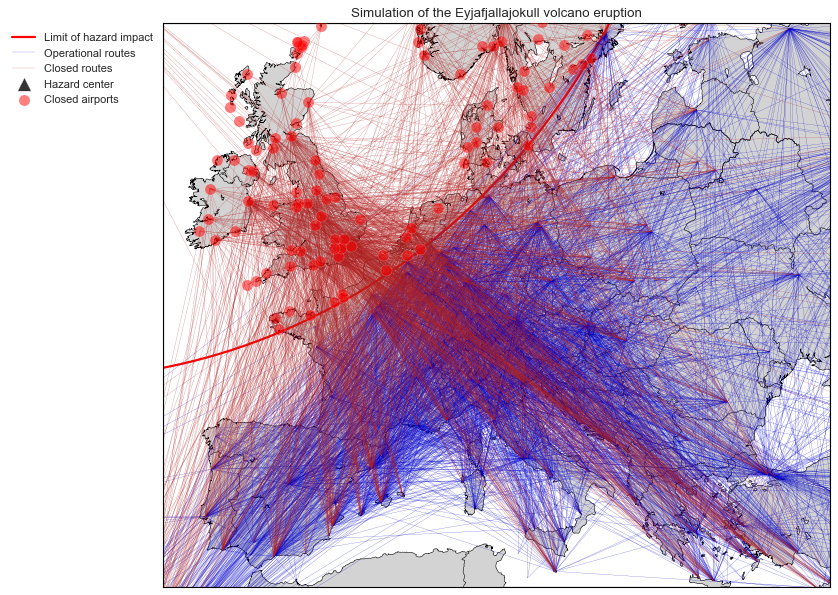

Wall time: 45.2 s


In [145]:
%time spatial_hazards.plot_hazard(title="Simulation of the Eyjafjallajokull volcano eruption")

Extreme points in Europe have the following latitude and longitude (in decimal degrees):

- North: 71.0814, 27.6974 
- South: 35.9959, -5.5725
- West: 38.7791, -9.4726
- East: 66.248, 67.7604

### Impact of Eyjafjallajökull volcano
We simulate the impact of the volcano as the radius of the covered area grows. We notice that the % of routes closed grows faster than the % of airports closed.

In [147]:
radii = range(1, 5000, 10)
props_airports_closed_volc = []
props_routes_closed_volc = []
props_size_gcc_volc = []

for radius in tqdm(radii):
    prop_airports_closed, prop_routes_closed, prop_size_gcc = \
                        spatial_hazards.simulate_hazard(lat_volcano, long_volcano, radius)
    props_airports_closed_volc.append(prop_airports_closed)
    props_routes_closed_volc.append(prop_routes_closed)
    props_size_gcc_volc.append(prop_size_gcc)

100%|██████████| 500/500 [00:48<00:00, 10.33it/s]


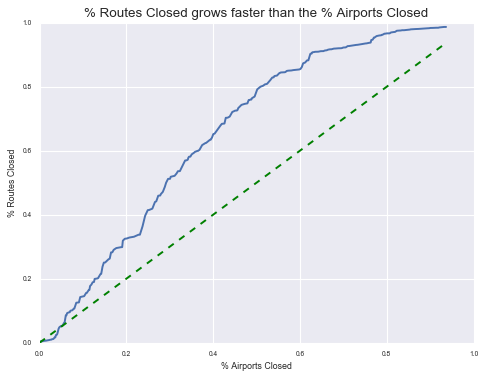

In [148]:
plt.figure(figsize=(7,5))
plt.plot(props_airports_closed_volc, props_routes_closed_volc)
plt.plot(props_airports_closed_volc, props_airports_closed_volc, 'g--')
plt.xlabel("% Airports Closed")
plt.ylabel("% Routes Closed")
plt.title("% Routes Closed grows faster than the % Airports Closed")
plt.show()

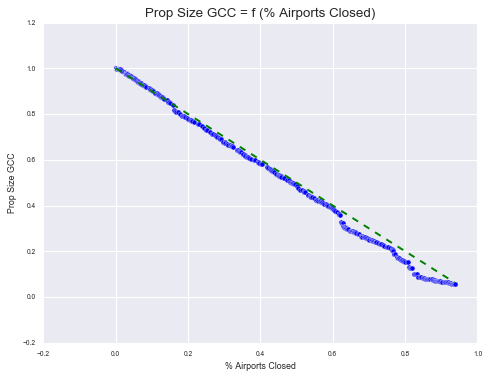

In [149]:
plt.figure(figsize=(7,5))
plt.scatter(props_airports_closed_volc, props_size_gcc_volc)
plt.plot(props_airports_closed_volc, [1-prop for prop in props_airports_closed_volc], "g--")
plt.xlabel("% Airports Closed")
plt.ylabel("Prop Size GCC")
plt.title("Prop Size GCC = f (% Airports Closed)")
plt.show()

Let's see how the % of Airports Closed grows with the radius.

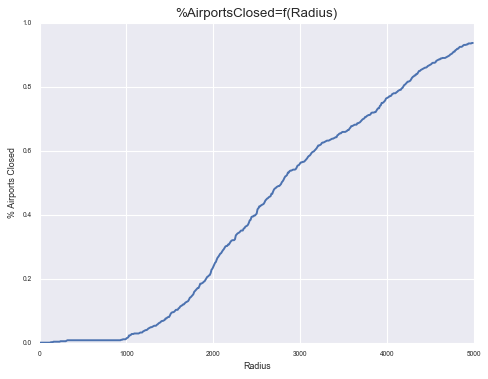

In [150]:
plt.figure(figsize=(7,5))
plt.plot(radii, props_airports_closed_volc)
plt.xlabel("Radius")
plt.ylabel("% Airports Closed")
plt.title("%AirportsClosed=f(Radius)")
plt.show()

### Impact of random hazards in Europe
We simulate N hazards of random centers in Europe, and random radius effect (between 1 and 5000km), and plot the effect of each in a %RoutesClosed=f(%AirportsClosed) graph

In [152]:
n_hazard = 500
props_airports_closed = []
props_routes_closed = []
props_size_gcc = []

for _ in tqdm(range(n_hazard)):
    prop_airports_closed, prop_routes_closed, prop_size_gcc = spatial_hazards\
                            .simulate_hazard()
    props_airports_closed.append(prop_airports_closed)
    props_routes_closed.append(prop_routes_closed)
    props_size_gcc.append(prop_size_gcc)

100%|██████████| 500/500 [00:57<00:00, 10.43it/s]


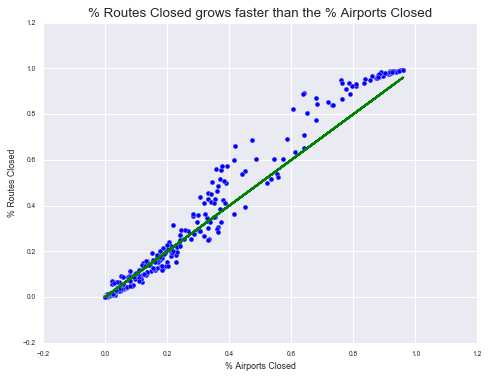

In [153]:
plt.figure(figsize=(7,5))
plt.scatter(props_airports_closed, props_routes_closed)
plt.plot(props_airports_closed, props_airports_closed, 'g--')
plt.xlabel("% Airports Closed")
plt.ylabel("% Routes Closed")
plt.title("% Routes Closed grows faster than the % Airports Closed")
plt.show()

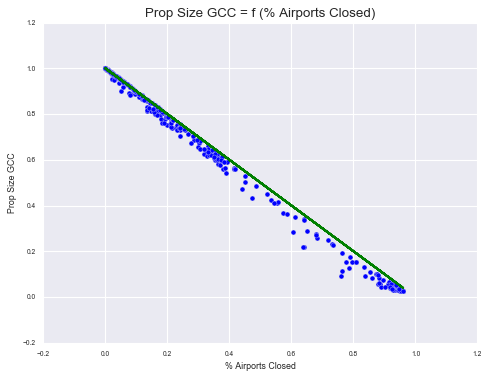

In [154]:
plt.figure(figsize=(7,5))
plt.scatter(props_airports_closed, props_size_gcc)
plt.plot(props_airports_closed, [1-prop for prop in props_airports_closed], "g--")
plt.xlabel("% Airports Closed")
plt.ylabel("Prop Size GCC")
plt.title("Prop Size GCC = f (% Airports Closed)")
plt.show()

## Europe map with connections

In [75]:
df_eur.head()

,airline,id_airline,source_airport,id_source_airport,destination_airport,id_destination_airport,codeshare,stops,equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


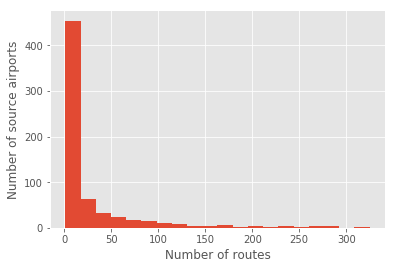

In [54]:
df_eur.groupby("source_airport")["destination_airport"].count().hist(bins=20)
plt.ylabel("Number of source airports")
plt.xlabel("Number of routes")
plt.show()

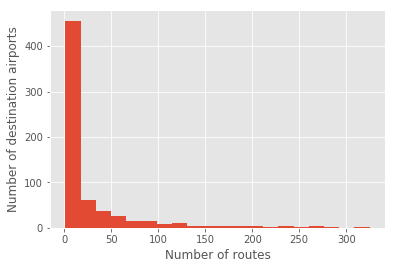

In [55]:
df_eur.groupby("destination_airport")["source_airport"].count().hist(bins=20)
plt.ylabel("Number of destination airports")
plt.xlabel("Number of routes")
plt.show()

- First let's join the 2 tables to get the routes with the latitude and longitude associated

In [56]:
# Rename IATA by source_airport
df_ap_source = df_airports_eur[["IATA", "latitude", "longitude"]]
df_ap_source = df_ap_source.rename(columns = {"IATA":"source_airport", 
                                              "latitude":"latitude_source",
                                              "longitude":"longitude_source"})

# Rename IATA by destination_airport
df_ap_dest = df_airports_eur[["IATA","latitude","longitude"]]
df_ap_dest = df_ap_dest.rename(columns = {"IATA":"destination_airport",
                                          "latitude":"latitude_dest",
                                          "longitude":"longitude_dest"})

# Join df on source and destination airport to get the latitude and longitude
df_eur_j = df_eur[["source_airport", "destination_airport"]]

df_eur_j = df_eur_j.join(df_ap_source.set_index("source_airport"), on="source_airport")
df_eur_j = df_eur_j.join(df_ap_dest.set_index("destination_airport"), on="destination_airport")

df_eur_j.head()

,source_airport,destination_airport,latitude_source,longitude_source,latitude_dest,longitude_dest
0,AER,KZN,43.449902,39.956600,55.606201,49.278702
1,ASF,KZN,46.283298,48.006302,55.606201,49.278702
2,ASF,MRV,46.283298,48.006302,44.225101,43.081902
3,CEK,KZN,55.305801,61.503300,55.606201,49.278702
4,CEK,OVB,55.305801,61.503300,55.012600,82.650703


In [57]:
# Optional: Delete the airports with few routes

# Preprocess (delete row with missing Ids and duplicates)
# df_eur = df_eur[((df_eur.id_source_airport != "\\N") & (df_eur.id_destination_airport != "\\N"))]
# df_eur = df_eur.drop_duplicates()

# Delete source_airport with occurrence less than threshold
def del_freq_source(df, threshold):
    vc = df_eur['source_airport'].value_counts()
    vals_to_remove = vc[vc <= threshold].index.values
    df_return = df[~df['source_airport'].isin(vals_to_remove)]
    return df_return

def del_freq_dest(df, threshold):
    vc = df_eur['destination_airport'].value_counts()
    vals_to_remove = vc[vc <= threshold].index.values
    df_return = df[~df['destination_airport'].isin(vals_to_remove)]
    return df_return

df_eur2 = del_freq_source(df_eur,10)
df_eur2 = del_freq_dest(df_eur,10)

print(len(df_eur))
print(len(df_eur2))

18423
16927


- First let's join the 2 tables to get the routes with the latitude and longitude associated

In [58]:
# Rename IATA by source_airport
df_ap_source = df_airports_eur[["IATA", "latitude", "longitude"]]
df_ap_source = df_ap_source.rename(columns = {"IATA":"source_airport", 
                                              "latitude":"latitude_source",
                                              "longitude":"longitude_source"})

# Rename IATA by destination_airport
df_ap_dest = df_airports_eur[["IATA","latitude","longitude"]]
df_ap_dest = df_ap_dest.rename(columns = {"IATA":"destination_airport",
                                          "latitude":"latitude_dest",
                                          "longitude":"longitude_dest"})

# Join df on source and destination airport to get the latitude and longitude
df_eur_j = df_eur[["source_airport", "destination_airport"]]

df_eur_j = df_eur_j.join(df_ap_source.set_index("source_airport"), on="source_airport")
df_eur_j = df_eur_j.join(df_ap_dest.set_index("destination_airport"), on="destination_airport")

df_eur_j.head()

,source_airport,destination_airport,latitude_source,longitude_source,latitude_dest,longitude_dest
0,AER,KZN,43.449902,39.956600,55.606201,49.278702
1,ASF,KZN,46.283298,48.006302,55.606201,49.278702
2,ASF,MRV,46.283298,48.006302,44.225101,43.081902
3,CEK,KZN,55.305801,61.503300,55.606201,49.278702
4,CEK,OVB,55.305801,61.503300,55.012600,82.650703


- Let's now plot the map

In [96]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [98]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
from utils import circle
import matplotlib as mpl

- Let's print the european routes (We plot 1000 routes, because the traffic is too dense)

/Users/nabiltoumi/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/nabiltoumi/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/nabiltoumi/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


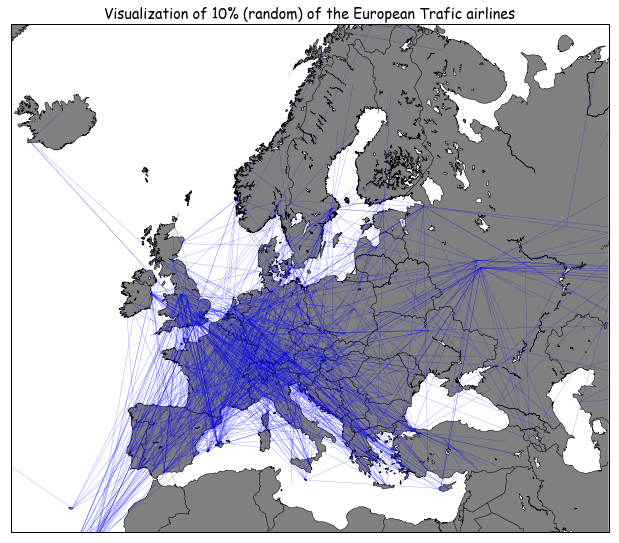

In [101]:
# 1. Settle the environment to plot
mpl.rcParams['font.size'] = 10.
mpl.rcParams['font.family'] = 'Comic Sans MS'
mpl.rcParams['axes.labelsize'] = 8.
mpl.rcParams['xtick.labelsize'] = 6.
mpl.rcParams['ytick.labelsize'] = 6.
fig = plt.figure(figsize=(11.7,8.3))
 
plt.subplots_adjust(left=0.05,right=0.95,top=0.90,bottom=0.05,wspace=0.15,hspace=0.05)
 
ax = plt.subplot(111)
 

    
# 2. Draw the background of the map 
m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2)
m.drawcountries(linewidth=0.5)
m.drawcoastlines(linewidth=0.5)  
m.fillcontinents(color='grey',lake_color='white')
m.drawmapboundary(fill_color='white') 
 

# 3. Plot the roots
i = 0
df_eur_j_random = df_eur_j.reindex(np.random.permutation(df_eur_j.index))
for index, row in df_eur_j_random.iterrows():
    i +=1
    lat = [row['latitude_source'], row['latitude_dest']]
    lon = [row['longitude_source'], row['longitude_dest']]
    x, y = m(lon,lat)
    m.plot(x, y,  linewidth=0.15, c = 'b')  #'o-', markersize=5,
    if i == 1000:
        break

plt.title("Visualization of 10% (random) of the European Trafic airlines")
plt.show()

- Represent the impact of a volcano erruption on the closed airports and routes

In [119]:
long_volcano

-19.605352

In [120]:
lat_volcano

63.628303

In [102]:
centerlon = long_volcano
centerlat = lat_volcano
# Radius of the impact
r = 2000 

/Users/nabiltoumi/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


Proportion of closed airports: 23.565%


/Users/nabiltoumi/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/nabiltoumi/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/nabiltoumi/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/nabiltoumi/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


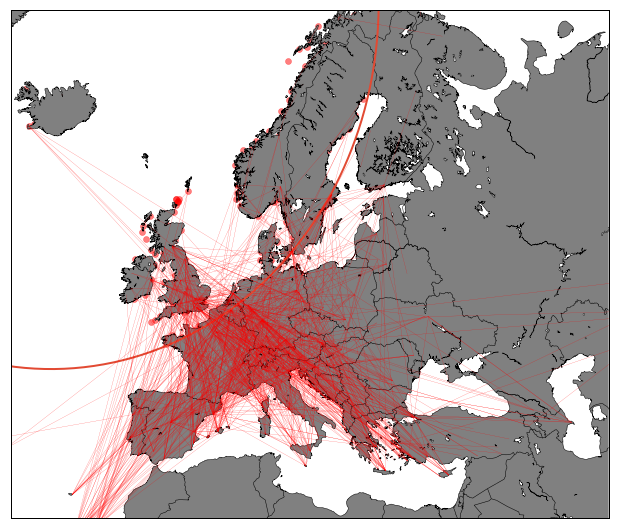

In [104]:
# 1. Settle the environment to plot
mpl.rcParams['font.size'] = 10.
mpl.rcParams['font.family'] = 'Comic Sans MS'
mpl.rcParams['axes.labelsize'] = 8.
mpl.rcParams['xtick.labelsize'] = 6.
mpl.rcParams['ytick.labelsize'] = 6.
fig = plt.figure(figsize=(11.7,8.3))
 
plt.subplots_adjust(left=0.05,right=0.95,top=0.90,bottom=0.05,wspace=0.15,hspace=0.05)
 
ax = plt.subplot(111)
 

    
# 2. Draw the background of the map 
m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2)
m.drawcountries(linewidth=0.5)
m.drawcoastlines(linewidth=0.5)  
m.fillcontinents(color='grey',lake_color='white')
m.drawmapboundary(fill_color='white') 


# 4. Plot the circle of impact
circle(m, centerlon, centerlat, r,lw=2.)

# 5. Plot in red the closed airports
closed_ariports = affected_aiports.get_airports_within_dist(lat_volcano, long_volcano, r, verbose=True)
lat_closed = [df_airports_eur[df_airports_eur['IATA']==clsd_airp]['latitude'] for clsd_airp in closed_airports]
long_closed = [df_airports_eur[df_airports_eur['IATA']==clsd_airp]['longitude'] for clsd_airp in closed_airports]

m.scatter(long_closed, lat_closed, latlon=True, alpha=0.5, c='r')

# 6. Plot in red the closed routes 
closed_routes = affected_aiports.new_routes
source_airports = closed_routes.source_airport
destination_airports = closed_routes.destination_airport
closed_routes = df_eur_j[(df_eur_j["source_airport"].isin(source_airports)) & 
                           (df_eur_j["destination_airport"].isin(destination_airports)) ]

closed_routes_random = closed_routes.reindex(np.random.permutation(closed_routes.index))
i = 0
for index, row in closed_routes_random.iterrows():
    i +=1
    lat = [row['latitude_source'], row['latitude_dest']]
    lon = [row['longitude_source'], row['longitude_dest']]
    x, y = m(lon,lat)
    m.plot(x, y,  linewidth=0.15, c = 'r')  #'o-', markersize=5,
    if i == 1000:
        break

    
plt.show()

- Brouillon, regroupe tout

/Users/nabiltoumi/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/nabiltoumi/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/nabiltoumi/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


Proportion of closed airports: 23.565%


/Users/nabiltoumi/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/nabiltoumi/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


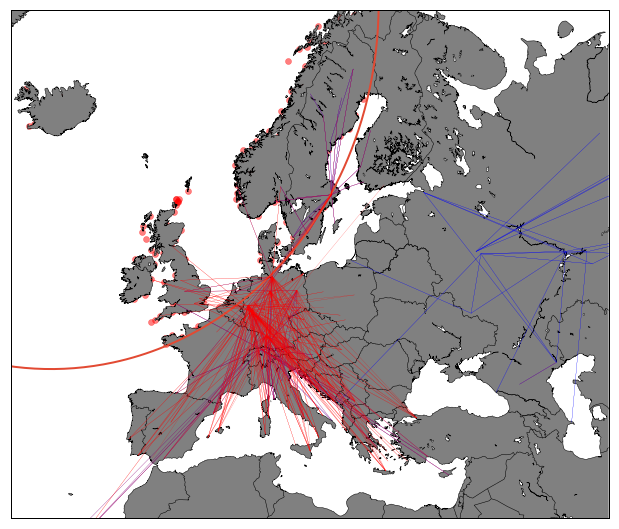

In [95]:
# 1. Settle the environment to plot

mpl.rcParams['font.size'] = 10.
mpl.rcParams['font.family'] = 'Comic Sans MS'
mpl.rcParams['axes.labelsize'] = 8.
mpl.rcParams['xtick.labelsize'] = 6.
mpl.rcParams['ytick.labelsize'] = 6.
fig = plt.figure(figsize=(11.7, 8.3))

plt.subplots_adjust(left=0.05, right=0.95, top=0.90,
                    bottom=0.05, wspace=0.15, hspace=0.05)

ax = plt.subplot(111)

# 2. Draw the background of the map

m = Basemap(resolution='i', projection='merc', llcrnrlat=y1,
            urcrnrlat=y2, llcrnrlon=x1, urcrnrlon=x2, lat_ts=(x1+x2)/2)
m.drawcountries(linewidth=0.5)
m.drawcoastlines(linewidth=0.5)
m.fillcontinents(color='grey', lake_color='white')
m.drawmapboundary(fill_color='white')

# 3. Plot the routes

i = 0
df_eur_j_random = df_eur_j.reindex(np.random.permutation(df_eur_j.index))
for index, row in df_eur_j_random.iterrows():
    i += 1
    lat = [row['latitude_source'], row['latitude_dest']]
    lon = [row['longitude_source'], row['longitude_dest']]
    x, y = m(lon, lat)
    m.plot(x, y,  linewidth=0.15, c='b')  # 'o-', markersize=5,
    if i == 1000:
        break

# 4. Plot the circle of the impact

centerlon = long_volcano
centerlat = lat_volcano
r = 2000
circle(m, centerlon, centerlat, r, lw=2.)

# 5. Plot in red the closed airports
closed_ariports = affected_aiports.get_airports_within_dist(
    lat_volcano, long_volcano, r, verbose=True)
lat_closed = [df_airports_eur[df_airports_eur['IATA'] ==
                              clsd_airp]['latitude'] for clsd_airp in closed_airports]
long_closed = [df_airports_eur[df_airports_eur['IATA'] ==
                               clsd_airp]['longitude'] for clsd_airp in closed_airports]

m.scatter(long_closed, lat_closed, latlon=True, alpha=0.5, c='r')

# 6. Plot in red the closed routes
closed_routes = affected_aiports.new_routes
source_airports = closed_routes.source_airport
destination_airports = closed_routes.destination_airport
closed_routes = df_eur_j[(df_eur_j["source_airport"].isin(source_airports)) &
                         (df_eur_j["destination_airport"].isin(destination_airports))]

closed_routes_random = closed_routes.reindex(
    np.random.permutation(closed_routes.index))
i = 0
for index, row in closed_routes_random.iterrows():
    i += 1
    lat = [row['latitude_source'], row['latitude_dest']]
    lon = [row['longitude_source'], row['longitude_dest']]
    x, y = m(lon, lat)
    m.plot(x, y,  linewidth=0.15, c='r')  # 'o-', markersize=5,
    if i == 1000:
        break


plt.show()


In [48]:
affected_airports.airports_info

NameError: name 'affected_airports' is not defined